In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load balanced dataset
df = pd.read_csv("/Users/sakshizanjad/Desktop/grocery_expiry_project/data/raw/Grocery_Inventory_and_Sales_Balanced.csv")

In [33]:
df.head()

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status,Expiry_Class
0,67-027-7269,Mushrooms,Fruits & Vegetables,50-050-5707,Twitterbeat,35,19,30,$6.50,1/6/2025,11/30/2024,2025-08-09,615 Mayer Drive,88,6,Backordered,Expired
1,22-083-3347,Long Grain Rice,Grains & Pulses,01-431-7544,Yodoo,69,82,58,$1.50,7/7/2024,4/29/2024,2025-07-12,38 Superior Road,34,22,Discontinued,Expired
2,21-013-3508,Cabbage,Fruits & Vegetables,64-489-8494,Meevee,12,95,49,$1.00,6/9/2024,6/13/2024,2025-07-09,84305 Fair Oaks Plaza,25,23,Backordered,Expired
3,15-240-6267,Eggplant,Fruits & Vegetables,12-983-3026,Mybuzz,91,55,94,$3.00,3/11/2024,4/10/2024,2025-07-02,25784 Old Gate Crossing,42,93,Active,Expired
4,70-871-4536,Swiss Cheese,Dairy,72-514-7323,Cogilith,29,4,17,$8.00,1/19/2025,11/13/2024,2025-03-16,5 Waxwing Junction,59,52,Active,Expired


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_ID               2970 non-null   object
 1   Product_Name             2970 non-null   object
 2   Catagory                 2967 non-null   object
 3   Supplier_ID              2970 non-null   object
 4   Supplier_Name            2970 non-null   object
 5   Stock_Quantity           2970 non-null   int64 
 6   Reorder_Level            2970 non-null   int64 
 7   Reorder_Quantity         2970 non-null   int64 
 8   Unit_Price               2970 non-null   object
 9   Date_Received            2970 non-null   object
 10  Last_Order_Date          2970 non-null   object
 11  Expiration_Date          2970 non-null   object
 12  Warehouse_Location       2970 non-null   object
 13  Sales_Volume             2970 non-null   int64 
 14  Inventory_Turnover_Rate  2970 non-null  

In [35]:
df.isnull().sum()

Product_ID                 0
Product_Name               0
Catagory                   3
Supplier_ID                0
Supplier_Name              0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Warehouse_Location         0
Sales_Volume               0
Inventory_Turnover_Rate    0
Status                     0
Expiry_Class               0
dtype: int64

In [36]:
df.columns

Index(['Product_ID', 'Product_Name', 'Catagory', 'Supplier_ID',
       'Supplier_Name', 'Stock_Quantity', 'Reorder_Level', 'Reorder_Quantity',
       'Unit_Price', 'Date_Received', 'Last_Order_Date', 'Expiration_Date',
       'Warehouse_Location', 'Sales_Volume', 'Inventory_Turnover_Rate',
       'Status', 'Expiry_Class'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_ID               2970 non-null   object
 1   Product_Name             2970 non-null   object
 2   Catagory                 2967 non-null   object
 3   Supplier_ID              2970 non-null   object
 4   Supplier_Name            2970 non-null   object
 5   Stock_Quantity           2970 non-null   int64 
 6   Reorder_Level            2970 non-null   int64 
 7   Reorder_Quantity         2970 non-null   int64 
 8   Unit_Price               2970 non-null   object
 9   Date_Received            2970 non-null   object
 10  Last_Order_Date          2970 non-null   object
 11  Expiration_Date          2970 non-null   object
 12  Warehouse_Location       2970 non-null   object
 13  Sales_Volume             2970 non-null   int64 
 14  Inventory_Turnover_Rate  2970 non-null  

In [38]:
df.duplicated().sum()

0

In [39]:
# Unique counts
print("\nUnique Categories:", df['Catagory'].nunique() if 'Catagory' in df else df['Category'].nunique())
print("Unique Products:", df['Product_ID'].nunique())
print("Unique Suppliers:", df['Supplier_ID'].nunique())


Unique Categories: 7
Unique Products: 990
Unique Suppliers: 990


In [40]:
df.describe(include="all")

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status,Expiry_Class
count,2970,2970,2967,2970,2970,2970.000000,2970.000000,2970.000000,2970,2970,2970,2970,2970,2970.000000,2970.000000,2970,2970
unique,990,121,7,990,350,NaN,NaN,NaN,112,351,332,282,990,NaN,NaN,3,3
top,67-027-7269,Bread Flour,Fruits & Vegetables,50-050-5707,Katz,NaN,NaN,NaN,$2.50,11/5/2024,1/16/2025,2025-09-12,615 Mayer Drive,NaN,NaN,Discontinued,Expired
freq,3,57,993,3,36,NaN,NaN,NaN,297,27,24,92,3,NaN,NaN,999,990
mean,NaN,NaN,NaN,NaN,NaN,55.609091,51.215152,51.913131,NaN,NaN,NaN,NaN,NaN,58.925253,50.150505,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,26.291915,29.085439,29.511115,NaN,NaN,NaN,NaN,NaN,22.994569,28.789252,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,10.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,20.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,33.000000,25.000000,25.000000,NaN,NaN,NaN,NaN,NaN,39.000000,25.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,56.000000,53.000000,54.000000,NaN,NaN,NaN,NaN,NaN,58.000000,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,79.000000,77.000000,77.000000,NaN,NaN,NaN,NaN,NaN,78.000000,75.000000,NaN,NaN


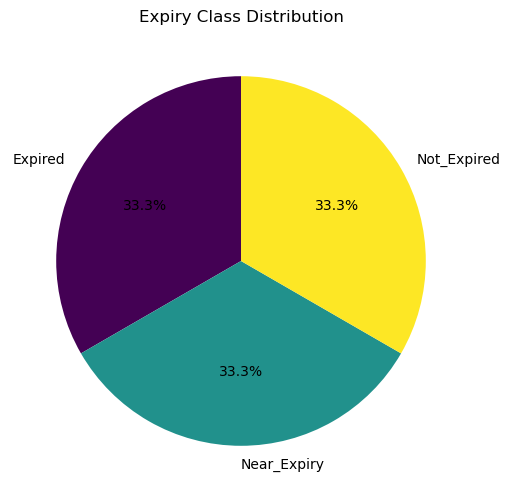

In [41]:
# Expiry Class Distribution
plt.figure(figsize=(6, 6))
df['Expiry_Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title("Expiry Class Distribution")
plt.ylabel("")
plt.show()

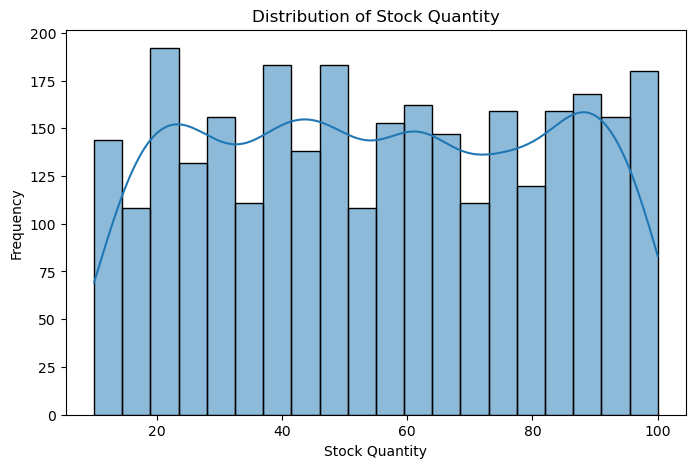

In [42]:
# Stock Quantity Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Stock_Quantity'], bins=20, kde=True)
plt.title("Distribution of Stock Quantity")
plt.xlabel("Stock Quantity")
plt.ylabel("Frequency")
plt.show()

In [49]:
print(df['Expiry_Class'].value_counts())

Expiry_Class
Expired        990
Near_Expiry    990
Not_Expired    990
Name: count, dtype: int64


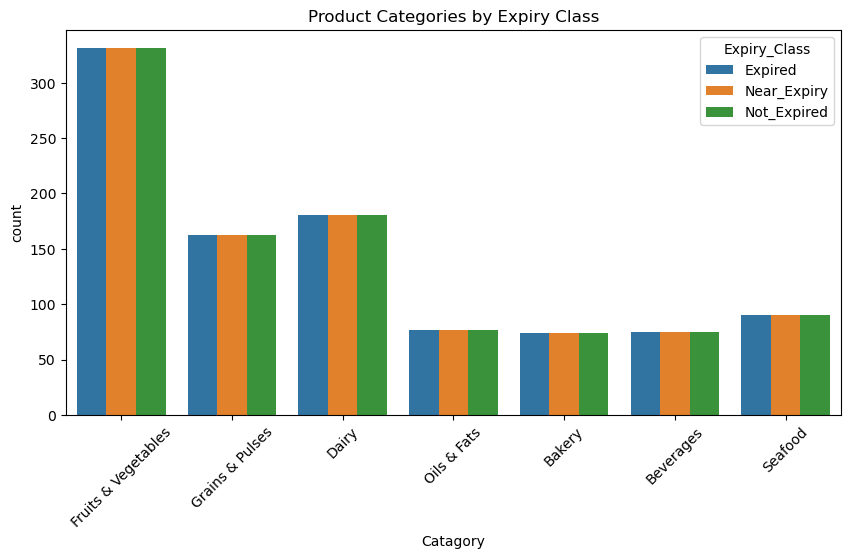

In [44]:
# Category Counts
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Catagory' if 'Catagory' in df else 'Category', hue="Expiry_Class")
plt.xticks(rotation=45)
plt.title("Product Categories by Expiry Class")
plt.show()

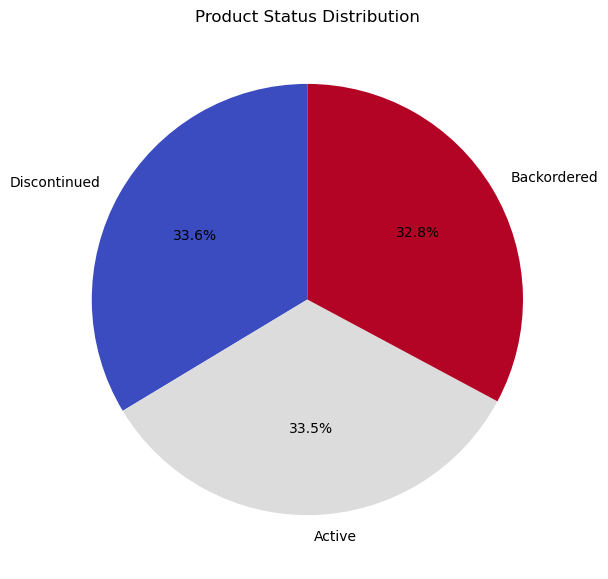

In [45]:
# Status Distribution
plt.figure(figsize=(7, 7))
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title("Product Status Distribution")
plt.ylabel("")
plt.show()


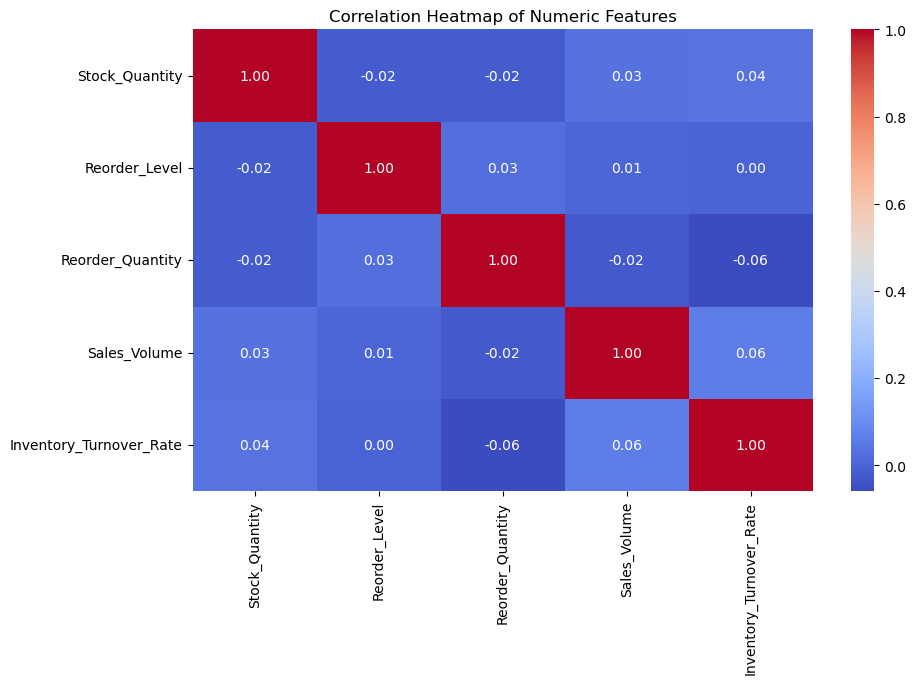

In [46]:
# Correlation Heatmap (only numeric cols)
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [47]:
print("\n✅ EDA Complete. Issues noted: Missing values, spelling mistake in 'Catagory'.")


✅ EDA Complete. Issues noted: Missing values, spelling mistake in 'Catagory'.
